In [1]:
from google.oauth2 import service_account
import pandas as pd
import gspread
import json
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
from PIL import Image
from io import BytesIO

In [2]:
#Import the json data
load_dotenv()
google_json = os.getenv('GOOGLE_JSON')

In [3]:
service_account_info = json.loads(google_json)
credentials = service_account.Credentials.from_service_account_info(service_account_info)

In [4]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds_with_scope = credentials.with_scopes(scope)

In [5]:
client = gspread.authorize(creds_with_scope)

In [6]:
spreadsheet = client.open_by_url(os.getenv('GOOGLE_SHEET'))

In [7]:
worksheet = spreadsheet.get_worksheet(0)

In [8]:
records_data = worksheet.get_all_records()

In [9]:
records_df = pd.DataFrame.from_dict(records_data)

In [10]:
records_df['K/D Ratio'] = round(records_df.Kills / records_df.Deaths, 1)
records_df

,Date time,Kills,Deaths,Accuracy,Shots Fired,Shots Hit,Damage Dealt,Damage Taken,Notes,K/D Ratio
0,23/02/2024 15:40,26,10,49.65,441,219,9206,5252,,2.6
1,23/02/2024 16:17,23,11,48.8,420,205,8463,4917,,2.1
2,23/02/2024 16:35,22,14,45.33,450,204,7646,5493,,1.6
3,23/02/2024 16:50,25,15,42.6,399,170,7566,5231,,1.7
4,23/02/2024 17:13,28,14,44.26,436,193,8615,5941,,2.0
5,23/02/2024 23:17,66,20,43.1,740,319,15396,8348,Changed to HCS:FFA,3.3
6,24/02/2024 18:09,61,25,42.73,681,291,13331,9140,First match of the day,2.4
7,24/02/2024 18:26,71,18,42.3,773,327,15292,8232,,3.9
8,24/02/2024 20:38,77,14,45.66,830,379,16861,7697,,5.5
9,25/02/2024 21:10,68,18,,,,,,Missing Data,3.8


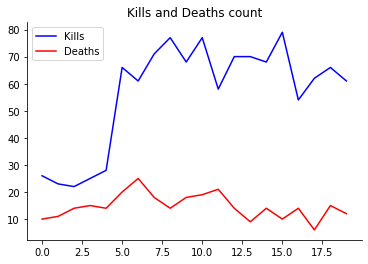

In [11]:
sns.lineplot(data=records_df, x=records_df.index, y='Kills', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Deaths', color='red')
sns.despine(left=False, bottom=False)
plt.title('Kills and Deaths count')
plt.ylabel('')
plt.legend(['Kills', 'Deaths'])

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B')

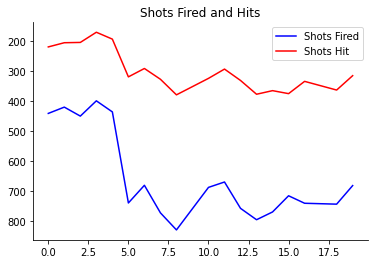

In [13]:
sns.lineplot(data=records_df, x=records_df.index, y='Shots Fired', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Shots Hit', color='red')
sns.despine(left=False, bottom=False)
plt.title('Shots Fired and Hits')
plt.ylabel('')
plt.legend(['Shots Fired', 'Shots Hit'])

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Fired'], mode='lines+markers', name='Shots Fired', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Hit'], mode='lines+markers', name='Shots Hit', line=dict(color='#05D9E8')))
fig.update_layout(title='Shooting', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

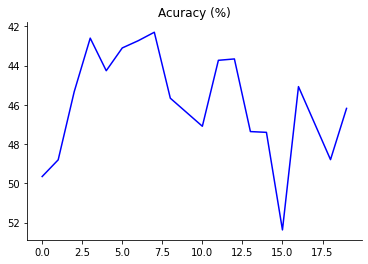

In [15]:
sns.lineplot(data=records_df, x=records_df.index, y='Accuracy', color='blue')
sns.despine(left=False, bottom=False)
plt.title('Acuracy (%)')
plt.ylabel('')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Accuracy'], mode='lines+markers', name='Accuracy', line=dict(color='#FF2A6D')))
fig.update_layout(title='Accuracy (%)', hovermode='x', plot_bgcolor='#01012B')

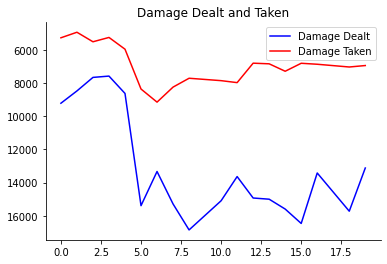

In [17]:
sns.lineplot(data=records_df, x=records_df.index, y='Damage Dealt', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Damage Taken', color='red')
sns.despine(left=False, bottom=False)
plt.title('Damage Dealt and Taken')
plt.ylabel('')
plt.legend(['Damage Dealt', 'Damage Taken'])

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Dealt'], mode='lines+markers', name='Damage Dealt', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Taken'], mode='lines+markers', name='Damage Taken', line=dict(color='#05D9E8')))
fig.update_layout(title='Damage', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

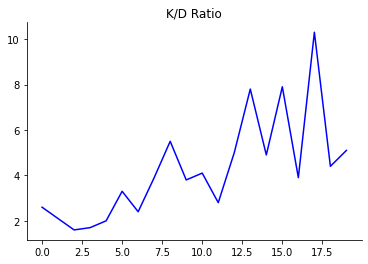

In [19]:
sns.lineplot(data=records_df, x=records_df.index, y='K/D Ratio', color='blue')
sns.despine(left=False, bottom=False)
plt.title('K/D Ratio')
plt.ylabel('')

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B')

In [21]:
def to_markdown(text):
    """Function to transform the text generated by AI to markdown

    Args:
        text (str): str text generated by AI

    Returns:
        Markdown: AI Text transformed to markdown
    """
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [22]:
#Using API Key to connect with the AI
genai.configure(api_key=os.getenv('GOOGLE_AI_KEY'))

In [23]:
#Selecting the model
model = genai.GenerativeModel('gemini-pro')

In [24]:
response = model.generate_content(f"""
Use the following information: {records_df}, also consider that the training sessions used to generate the data are 8 bots against
and the player in a free for all match in Halo Infinite, following Halo Championship Series rules, and perform the following tasks:
1. Perform a general analysis of the data.
2. Extract the dates with the best and worst results.
3. Generate tips that can help the player improve their individually skills.
4. Considering the results obtained, is there any correlation between the data?
5. Can you assume what style of play the player uses and how could it improve individually?
6. How should the player reduce its negative stats without altering the individual playstyle assumed in point 5?
7. Based on point 6, What strategies can the player use within the game to overcome challenges and What resources are available outside the game that can help the player learn and grow?""")
to_markdown(response.text)

>## 1. General analysis of the data.
>
>The data shows that the player's performance has been improving over time. The player's average accuracy has increased from 42.6% to 48.79% and their average K/D ratio has increased from 1.6 to 4.4. The player's best result was on the 24th of February 2024, when they had a K/D ratio of 7.8 and an accuracy of 47.36%. Their worst result was on the 23rd of February 2024, when they had a K/D ratio of 1.6 and an accuracy of 42.6%.
>
>## 2. Dates with the best and worst results.
>
>| Date | K/D Ratio | Accuracy |
>|---|---|---|
>| 24/02/2024 | 7.8 | 47.36% |
>| 23/02/2024 | 1.6 | 42.6% |
>
>## 3. Tips that can help the player improve their individual skills.
>
>* **Aim for the head.** Headshots deal more damage than body shots, so it will help you kill your opponents more quickly.
>* **Use cover.** Stay behind cover as much as possible to avoid getting shot.
>* **Move around.** Don't stand still in one place, as it will make you an easy target.
>* **Use grenades.** Grenades can be used to kill opponents, damage them, or flush them out of cover.
>* **Learn the maps.** Knowing the maps will help you find good positions to attack and defend from.
>* **Practice.** The more you practice, the better you will become at the game.
>
>## 4. Correlation between the data.
>
>There is a positive correlation between the player's accuracy and their K/D ratio. This suggests that the more accurate the player is, the more kills they will get and the fewer deaths they will have.
>
>## 5. Assumed playstyle and how to improve individually.
>
>Based on the data, it can be assumed that the player uses a run-and-gun playstyle. This playstyle involves moving around quickly and shooting at opponents from close range. To improve their individual skills, the player should focus on improving their aim and movement. They should also learn to use cover more effectively.
>
>## 6. How to reduce negative stats without altering individual playstyle.
>
>To reduce their negative stats without altering their individual playstyle, the player should focus on the following:
>
>* **Dying less.** This can be done by staying behind cover, using grenades to flush opponents out of cover, and learning the maps.
>* **Getting more kills.** This can be done by improving aim, movement, and grenade usage.
>* **Playing more strategically.** This can be done by learning the game mechanics and understanding how to use them to your advantage.
>
>## 7. Strategies to overcome challenges and resources to learn and grow.
>
>The player can use the following strategies to overcome challenges:
>
>* **Use the environment to your advantage.** This includes using cover, grenades, and other objects to help you survive and kill your opponents.
>* **Team up with other players.** Teaming up with other players can help you take down opponents more quickly and easily.
>* **Learn from your mistakes.** When you die, take some time to think about what you could have done differently. This will help you avoid making the same mistakes in the future.
>
>The player can use the following resources to learn and grow:
>
>* **Halo Infinite Wiki**
>* **YouTube**
>* **Twitch**
>* **Discord**
>* **Coaching**

In [25]:
def last_matchs_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
    fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [26]:
def kd_ratio_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
    fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [27]:
def create_image_from_plot(plot):
   """
   Creates a PIL Image object from a plot object without using temporary files.

   Args:
       plot: The plot object to convert to an image.

   Returns:
       The PIL Image object representing the plot.
   """

   img_bytes = plot.to_image(format='png')
   img_data = BytesIO(img_bytes)
   img = Image.open(img_data)
   return img

plot = create_image_from_plot(kd_ratio_plot(records_df))

In [28]:

img_model = genai.GenerativeModel('gemini-pro-vision')
promt = """
Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
"""
response = img_model.generate_content([promt, plot], stream=True)
response.resolve()
#to_markdown(response.text)
for candidate in response.candidates:
    answer = [part.text for part in candidate.content.parts]
for i in answer:
    print(i)

 Analyzing the data, it is clear that the player has improved their skills over time. The K/D ratio has increased steadily, with a few notable exceptions. The player's best performance was on 29/02/2024, when they achieved a K/D ratio of 10. This was followed by another strong performance on 28/02/2024, with a K/D ratio of 8.

The player's worst performance was on 23/02/2024, when they achieved a K/D ratio of 1. This was followed by another poor performance on 25/02/2024, with a K/D ratio of 3.

It is also worth noting that the player's performance seems to be improving at a faster rate since they started playing against 8 bots instead of 4. This is likely because the player is getting more practice and is able to learn from their mistakes more quickly.

Based on the data, the player should continue to practice and focus on improving their skills. They should also consider playing against 8 bots more often, as this seems to be helping them improve at a faster rate.


In [29]:
try:
    img_model = genai.GenerativeModel('gemini-pro-vision')
    promt = """
    Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
    """
    response = img_model.generate_content([promt, plot], stream=True)
    response.resolve()
    to_markdown(response.text)
except Exception as e:
    img_model = genai.GenerativeModel('gemini-pro-vision')
    promt = """
    Use the plot and make an analysis about the data shown in it, using the next context:
            1. The data is generated after a training match between a human and 8 bots in Halo infinite, following Halo Championship
            series rules in a free for all match
            2.  The focus of the training is to improve the skills of the player
            3. The plot contains the results of all matches played so far
            4. Have in mind that the first 5 matches were played against 4 bots instead of 8
            5. Advice the player how to improve his skills based on the data analyzed
            Also, do not calculate averages to do the analysis
    """
    response = img_model.generate_content([promt, plot], stream=True)
    response.resolve()
    for candidate in response.candidates:
        answer = [part.text for part in candidate.content.parts]
    for i in answer:
        print(i)